In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('test.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [3]:
# removing id and dl
data.drop(['id','Driving_License'], axis=1, inplace=True)

#lets encode the object columns
data['Gender'] = data['Gender'].replace(('Male','Female'),(1, 0))
data['Vehicle_Age'] = data['Vehicle_Age'].replace(('< 1 Year','1-2 Year','> 2 Years'),(0,1,2))
data['Vehicle_Damage'] = data['Vehicle_Damage'].replace(('Yes','No'),(1, 0))

In [4]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,11.0,1,0,0,35786.0,152.0,53
1,1,40,28.0,0,1,1,33762.0,7.0,111
2,1,47,28.0,0,1,1,40050.0,124.0,199
3,1,24,27.0,1,0,1,37356.0,152.0,187
4,1,27,28.0,1,0,0,59097.0,152.0,297


In [5]:
x = data.iloc[:,:]
x[0:3]

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,11.0,1,0,0,35786.0,152.0,53
1,1,40,28.0,0,1,1,33762.0,7.0,111
2,1,47,28.0,0,1,1,40050.0,124.0,199


In [6]:
# loading Vehicle_Insurance_classif ml model

import pickle

filename = 'Vehicle_Insurance_classif.sav'
load_model = pickle.load(open(filename , 'rb'))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

y = load_model.predict(x)
y

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [7]:
score = load_model.score(x, y)
print("score: {0:.2f} %".format(100 * score))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


score: 100.00 %


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


<AxesSubplot:ylabel='count'>

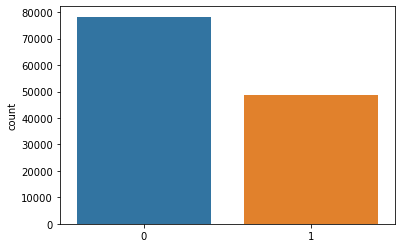

In [8]:
import seaborn as sns
sns.countplot(y)

In [9]:
data['Reponse'] = y.tolist()
data

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Reponse
0,1,25,11.0,1,0,0,35786.0,152.0,53,0
1,1,40,28.0,0,1,1,33762.0,7.0,111,0
2,1,47,28.0,0,1,1,40050.0,124.0,199,1
3,1,24,27.0,1,0,1,37356.0,152.0,187,0
4,1,27,28.0,1,0,0,59097.0,152.0,297,0
...,...,...,...,...,...,...,...,...,...,...
127032,0,26,37.0,1,0,0,30867.0,152.0,56,0
127033,0,38,28.0,0,1,1,28700.0,122.0,165,1
127034,1,21,46.0,1,0,0,29802.0,152.0,74,0
127035,1,71,28.0,1,1,0,62875.0,26.0,265,0


In [10]:
data[:20]

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Reponse
0,1,25,11.0,1,0,0,35786.0,152.0,53,0
1,1,40,28.0,0,1,1,33762.0,7.0,111,0
2,1,47,28.0,0,1,1,40050.0,124.0,199,1
3,1,24,27.0,1,0,1,37356.0,152.0,187,0
4,1,27,28.0,1,0,0,59097.0,152.0,297,0
5,1,22,30.0,1,0,0,40207.0,152.0,266,0
6,0,51,37.0,1,1,0,40118.0,26.0,107,0
7,1,25,41.0,1,0,0,23375.0,152.0,232,0
8,1,42,41.0,0,1,1,2630.0,26.0,277,1
9,0,37,12.0,1,1,0,27124.0,124.0,133,0
